###  Importación de librerías

In [1]:
import random as rdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Inicialización de algunas variables que después modificaremos

In [2]:
hostnames = []
dataset = []
df= None

### Creación de una función para generar los hostnames en base a unas reglas

Estas reglas son:

 ● La función se ha de llamar set_hostnames y debe recibir un
 parámetro llamado number_of_hosts de tipo int que represente el
 número de hosts que queremos generar.
 
 ● El hostname debe estar compuesto por un total de 8 carácteres
 alfanuméricos, las letras siempre mayúsculas.
 
 ● El primer caracter debe indicar el sistema operativo, siendo L
 para Linux, S para Solaris, A para AIX y H para HP-UX. La proporción
 aproximada de sistemas operativos debe ser:
 
 ○ Linux: 40%
 ○ Solaris: 30%
 ○ AIX: 20%
 ○ HP-UX:10%
 
 ● El segundo caracter debe indicar el entorno, siendo D para
 Development, I para Integration, T para Testing, S para Staging y P
 para Production. La proporción aproximada de entornos debe ser:
 
 ○ Development: 10%
 ○ Integration: 10%
 ○ Testing: 25%
 ○ Staging: 25%
 ○ Production: 30%
 
 ● Los tres siguientes caracteres deben indicar el país, siendo NOR
 para Norway, FRA para France, ITA para Italy, ESP para Spain, DEU
 para Germany e IRL para Ireland. La proporción aproximada de
 países debe ser:
 
 ○ Norway: 6%
 ○ France: 9%
 ○ Italy: 16%
 ○ Spain: 16%
 ○ Germany: 23%
 ○ Ireland: 30%
 
 ● Por último 3 dígitos que indiquen el número de nodo que ya
 existe para un mismo sistema operativo, entorno y país. El valor
 debe ser incremental, comenzando en 001 y con un valor máximo
 de 999

In [3]:
def set_hostnames(number_of_hosts: int) -> None:
    hostname_prefix = ["L"]*40 + ["S"]*30 + ["A"]*20 + ["H"]*10
    enviroments = ["D"]*10  + ["I"]*10 + ["T"]*25 + ["S"]*25 + ["P"]*30
    countries = ["NOR"]*6 + ["FRA"]*9 + ["ITA"]*16 + ["ESP"]*16 + ["DEU"]*23 + ["IRL"]*30
    alpha_group = []
    
    for i in range (number_of_hosts):
        country = rdm.choice(countries)
        hostname = rdm.choice(hostname_prefix) + rdm.choice(enviroments)
        hostname += country
        alpha_group.append(hostname)
        hostname += str(alpha_group.count(hostname)).zfill(3)
        hostnames.append(hostname)
        

### Creación de una función para obtener el nombre del SO

 La función se ha de llamar get_os, debe recibir un parámetro llamado
 hostname de tipo str y debe devolver una cadena Linux, Solaris, AIX o
 HP-UX dependiendo de la primera letra del parámetro hostname. Debería
 ser improbable que el hostname recibido como parámetro comience por
 una letra diferente de L, S, A o H, pero de darse el caso, la función debe
 devolver la cadena Unknow

In [4]:
def get_os(hostname: str) -> str:
    if hostname.startswith("L"):
        return "Linux"
    elif hostname.startswith("S"):
        return "Solaris"
    elif hostname.startswith("A"):
        return "AIX"
    elif hostname.startswith("H"):
        return "HP-UX"
    else:
        return "Unknown"

### Crear una función para obtener el nombre del entorno.

La función se ha de llamar get_enviroment, debe recibir un parámetro
 llamado hostname de tipo str y debe devolver una cadena Development,
 Integration, Testing, Staging o Production dependiendo de la segunda
 letra del parámetro hostname. Debería ser improbable que el hostname
 recibido como parámetro tenga por segundo caracter por una letra
 diferente de D, I, T, S o P, pero de darse el caso, la función debe devolver
 la cadena Unknow

In [5]:
def get_enviroment(hostname: str) -> str:
    if hostname[1] == "D":
        return "Development"
    elif hostname[1] == "I":
        return "Integration"
    elif hostname[1] == "T":
        return "Testing"
    elif hostname[1] == "S":
        return "Staging"
    elif hostname[1] == "P":
        return "Production"
    else:
        return "Unknown"

### Creamos una función para obtener el nombre del país. 

La función se ha de llamar get_country, debe recibir un parámetro
 llamado hostname de tipo str y debe devolver una cadena Norway,
 Germany, Italy, Spain, Ireland o France dependiendo de las letras de la
 tercera a la quinta del parámetro hostname. Debería ser improbable que el
 hostname recibido como parámetro tenga por caracteres en las
 posiciones 3, 4, 5, caracteres diferentes de NOR, DEU, ITA, ESP, IRL o FRA,
 pero de darse el caso, la función debe devolver la cadena Unknow.

In [6]:
def get_country(hostname: str) -> str:
    if hostname[2:5] == "NOR":
        return "Norway"
    elif hostname[2:5] == "FRA":
        return "France"
    elif hostname[2:5] == "DEU":
        return "Germany"
    elif hostname[2:5] == "ITA":
        return "Italy"
    elif hostname[2:5] == "ESP":
        return "Spain"
    elif hostname[2:5] == "IRL":
        return "Ireland"
    else:
        return "Unknown"

###  Crear una función para generar el DataFrame.

 La función se ha de llamar set_dataframe y debe recibir un parámetro
 llamado count de tipo int, que represente el número de registros (filas)
 que vemos a generar. Para poder establecer un valor a la variable df que
 se encuentra fuera de la función y que inicialmente iniciamos con un
 valor None, debemos invocar a la variable df como global dentro de esta
 función. A continuación debemos llamar a la función set_hostnames
 pasándole como argumento el parámetro count. Después debemos ir
 añadiendo a la lista dataset que teníamos inicializada al principio de la
 práctica (primer punto) como lista vacía [] un diccionario por cada
 hostname de nuestra lista hostnames. Los campos de este diccionario
 deben ser:
 
 ● hostname: Por ejemplo LDIRL003
 
 ● os: Por ejemplo Linux
 
 ● enviroment: Por ejemplo Development
 
 ● country: Por ejemplo Ireland
 
 ● node: Detipo int, por ejemplo 3
 
 Finalmente creamos un DataFrame utilizando los datos de la lista de
 diccionarios dataset y asignando el DataFrame de Pandas a la variable
 global df

In [7]:
def set_dataframe(count: int) -> None:
    global df
    
    set_hostnames(count)
    
    for hostname in hostnames:
        dataset.append({
            "hostname": hostname,
            "os": get_os(hostname),
            "enviroment": get_enviroment(hostname),
            "country": get_country(hostname),
            "node": int(hostname[-3:])
        })

    df = pd.DataFrame(dataset)

### Creación del DataFrame

In [8]:
set_dataframe(1500)

In [9]:
df

,hostname,os,enviroment,country,node
0,STIRL001,Solaris,Testing,Ireland,1
1,LIFRA001,Linux,Integration,France,1
2,HDIRL001,HP-UX,Development,Ireland,1
3,LTDEU001,Linux,Testing,Germany,1
4,ADFRA001,AIX,Development,France,1
...,...,...,...,...,...
1495,LSESP029,Linux,Staging,Spain,29
1496,HSIRL012,HP-UX,Staging,Ireland,12
1497,LSITA028,Linux,Staging,Italy,28
1498,LTESP020,Linux,Testing,Spain,20


In [10]:
df.to_csv("hosts.csv", header=True, index=False)

In [11]:
hosts_df = pd.read_csv("hosts.csv")

In [12]:
hosts_df

,hostname,os,enviroment,country,node
0,STIRL001,Solaris,Testing,Ireland,1
1,LIFRA001,Linux,Integration,France,1
2,HDIRL001,HP-UX,Development,Ireland,1
3,LTDEU001,Linux,Testing,Germany,1
4,ADFRA001,AIX,Development,France,1
...,...,...,...,...,...
1495,LSESP029,Linux,Staging,Spain,29
1496,HSIRL012,HP-UX,Staging,Ireland,12
1497,LSITA028,Linux,Staging,Italy,28
1498,LTESP020,Linux,Testing,Spain,20


In [13]:
df

,hostname,os,enviroment,country,node
0,STIRL001,Solaris,Testing,Ireland,1
1,LIFRA001,Linux,Integration,France,1
2,HDIRL001,HP-UX,Development,Ireland,1
3,LTDEU001,Linux,Testing,Germany,1
4,ADFRA001,AIX,Development,France,1
...,...,...,...,...,...
1495,LSESP029,Linux,Staging,Spain,29
1496,HSIRL012,HP-UX,Staging,Ireland,12
1497,LSITA028,Linux,Staging,Italy,28
1498,LTESP020,Linux,Testing,Spain,20


### Generación de un único gráfico, agrupando para cada país (country) los entornos (enviroment).

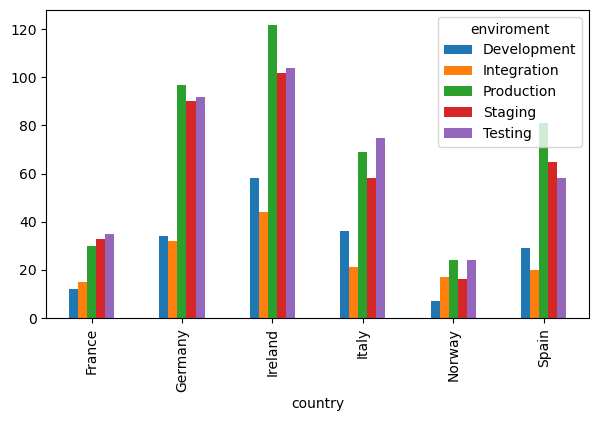

In [14]:
grouped_country_enviroment = hosts_df.groupby(["country", "enviroment"]).size().unstack()
grouped_country_enviroment.plot(kind="bar", figsize=(7, 4))
plt.show()

# Creación de una figura con 4 gráficos en una malla de 2 filas y 2 columnas.


 ● En la esquina superior izquierda debe aparecer un gráfico cuyo
 título sea Type of OS grouped by country. Debe ser un gráfico de
 barras horizontales que representen una agrupación (groupby) por
 cada país (country) de los sistemas operativos (os) que tiene. Se
 debe utilizar la función unstack y el plot debe ser de tipo barras
 horizontales (barh).
 
 ● En la esquina superior derecha debe aparecer un gráfico cuyo
 título sea Total Operating Systems. Debe representar la cantidad
 total de sistemas operativos (os) que hay en el DataFrame. Se
 debe utilizar la función groupby y el gráfico debe ser de tipo tarta
 (pie). Como etiquetas (labels) debe mostrar el número de
 sistemas operativos de cada tipo, y además debe mostrarse una
 leyenda (legend) en la esquina superior derecha en la que
 aparezca para cada sistema operativo el porcentaje existente en
 el DataFrame.
 
 ● En la esquina inferior izquierda debe aparecer un gráfico cuyo
 título sea Total hosts by country. Debe ser un gráfico de barras
 horizontales que representen la cantidad total de hosts por cada
 país, para ello se debe utilizar la función value_counts() sobre los
 países (country) del DataFrame. El gráfico generado debe incluir
 como etiqueta en el eje x el texto Number of hosts y como etiqueta
 del eje y el texto Country. También se ha de incluir el número total
 de hosts que tiene cada país a la derecha de cada barra
 horizontal. Además, se ha de añadir como valor máximo del eje x
 un número equivalente al número total de hosts+100, de este
 modo se verá un pequeño margen a la derecha que hará que se
 visualice un poco mejor. Opcionalmente (si se hace puntuará) se
 puede añadir con la librería seaborn una paleta de colores
 (color_palette) que podemos utilizar para darle un color
 degradado a las barras.
 
 ● En la esquina inferior derecha debe aparecer un gráfico cuyo
 título sea Hosts by country grouped by enviroment. Debe
 representar una agrupación (groupby) de hosts que hay por cada
 país (country) y entorno (enviroment). Se debe utilizar la función
 unstack(0) y el plot debe ser de tipo barras (bar). Como etiqueta
 del eje y se debe añadir el texto Number of hosts.
 Finalmente se deben ajustar los márgenes y espacios entre los
 gráficos (fig.tight_layout()).

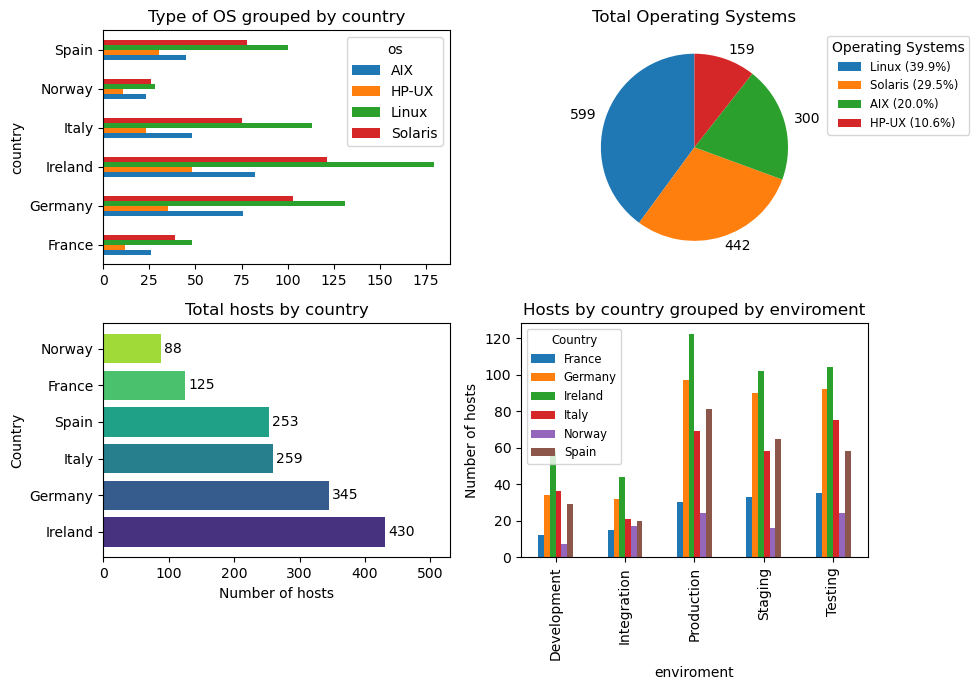

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10,7))

grouped_country_os = hosts_df.groupby(["country","os"]).size().unstack()
grouped_country_os.plot(kind="barh", ax=axs[0, 0])
axs[0, 0].set_title("Type of OS grouped by country")

    
total_os_count = hosts_df['os'].value_counts()
axs[0, 1].pie(total_os_count, labels= total_os_count[["Linux","Solaris","AIX","HP-UX"]], labeldistance =1.1, startangle=90)

# Calculo de los porcentajes
porcentajes = total_os_count / total_os_count.sum() * 100

# Crea el gráfico de tarta
axs[0, 1].legend(labels=[f'{os} ({porcentaje:.1f}%)' for os, porcentaje in zip(total_os_count.index, porcentajes)],
                 title="Operating Systems",
                 loc="upper right",
                 bbox_to_anchor=(1.2, 0, 0.5, 1),
                 fontsize="small")
axs[0, 1].set_title("Total Operating Systems")


total_hosts_by_country = hosts_df['country'].value_counts()
colors = sns.color_palette("viridis", len(total_hosts_by_country))
axs[1, 0].barh(total_hosts_by_country.index, total_hosts_by_country, color=colors)
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')
axs[1, 0].set_title('Total hosts by country')
axs[1, 0].set_xlim(0, max(total_hosts_by_country) + 100)


for index, value in enumerate(total_hosts_by_country):
    axs[1, 0].text(value + 5, index, str(value), va='center')

grouped_hosts_by_env = hosts_df.groupby(["country", "enviroment"]).size().unstack(0)
grouped_hosts_by_env.plot(kind="bar", ax=axs[1, 1])
axs[1, 1].set_ylabel('Number of hosts')
axs[1, 1].set_title('Hosts by country grouped by enviroment')
legend = axs[1, 1].legend(title='Country', fontsize='small')
legend.get_title().set_fontsize('small')
fig.tight_layout()

plt.show()